In [55]:
import random
from math import sin, pi
import matplotlib.pyplot as plt

In [1]:
class Game:
    def __init__(self, game_number, p1, p2):
        self.game_number = game_number
        self.p1_moves = []
        self.p2_moves = []
        self.p1 = p1
        self.p2 = p2
        
    def play_round(self):
        p1_move = self.p1.play(self.p1_moves, self.p2_moves)
        p2_move = self.p2.play(self.p2_moves, self.p1_moves)
        
        self.p1_moves.append(p1_move)
        self.p2_moves.append(p2_move)
        
        if p1_move and p2_move:
            self.p1.score += 3
            self.p2.score += 3
        elif p1_move and (not p2_move):
            self.p2.score += 5
        elif (not p1_move) and p2_move:
            self.p1.score += 5
        
#         print(f'Round {len(self.p1_moves)}: {self.p1.name}: Played {p1_move} and score is {self.p1.score}, {self.p2.name}: Played {p2_move} and score is {self.p2.score}')
        
    def print_results(self):
        if self.p1.score > self.p2.score:
            print(f'{self.p1.name} wins with a score of {self.p1.score}. {self.p2.name} finished with a score of {self.p2.score}.')
        elif self.p1.score < self.p2.score:
            print(f'{self.p2.name} wins with a score of {self.p2.score}. {self.p1.name} finished with a score of {self.p1.score}.')
        else:
            print(f'Tie Game. Both finished with {self.p1.score} points.')

class Round_Robin:
    def __init__(self, strats, num_rounds):
        self.strats = strats
        self.num_rounds = num_rounds
    def play_rr(self):    
        for i in range(1,len(self.strats)):
            for j in range(0, i):
                curr_game = Game(self.strats[i].name + " vs. " + self.strats[j].name, self.strats[i], self.strats[j])
                for k in range(0,self.num_rounds):
                    curr_game.play_round()
                # curr_game.print_results()
                self.strats[i].overall_score += self.strats[i].score
                self.strats[i].score = 0
                self.strats[j].overall_score += self.strats[j].score
                self.strats[j].score = 0
        
        results = []
        names = []
        for strat in self.strats:
#             print(f'{strat.name}: {strat.overall_score}')
            names.append(strat.name)
            results.append(strat.overall_score)
        plt.bar(names, results)
        plt.xticks(range(len(names)), names, rotation='vertical')
    
            
class Strategy:
    def __init__(self, id, name):
        self.id = id
        self.name = name
        self.score = 0
        self.overall_score = 0
    def printInfo(self):
        print(self.id)
        print(self.name)
    def play(self, my_moves, opp_moves):
        return True
        
class Always_Defect(Strategy):
    # always defects regardless of opponent's move
    def play(self, my_moves, opp_moves):
        return False

# has a 50/50 chance of defecting each time
class Random(Strategy):
    def play(self, my_moves, opp_moves):
        return bool(random.randint(0,1))
    
# copies opponent's last move, cooperates initially
class Tit_For_Tat(Strategy):
    def play(self, my_moves, opp_moves):
        if len(opp_moves) == 0:
            return True
        else:
            return opp_moves[-1]

# only defects if the opponent defects twice in a row
class Tit_For_Two_Tats(Strategy):
    def play(self, my_moves, opp_moves):
        if len(opp_moves) < 2:
            return True
        if not opp_moves[-1] and not opp_moves[-2]:
            return False
        return True
    
# only defects if the opponent has defected at least 10% of the moves
class Forgiver(Strategy):
    def play(self, my_moves, opp_moves):
        if(len(opp_moves) == 0):
            return True
        counter = 0
        for i in opp_moves:
            if not i:
                counter += 1
        if counter/len(opp_moves) >= 0.1:
            return False
        return True

# cooperates until opponent defects for a fourth time
class Backstabber(Strategy):    
    def play(self, my_moves, opp_moves):
        counter = 0
        for move in opp_moves:
            if not move:
                counter += 1
        if counter > 3:
            return False
        return True
    
# less and less likely to defect as game goes on    
class Better_And_Better(Strategy):
    def play(self, my_moves, opp_moves):
        return random.random() > (1000-len(opp_moves)/1000)
    
# More and more likely to defect as round goes on    
class Worse_And_Worse(Strategy):
    def play(self, my_moves, opp_moves):
        return random.random() < (1000-len(opp_moves)/1000)

# try out the darwin

# Defects with a probability that is inversely proportional to the number of times the opponent has defected
class Inverse(Strategy):
    def play(self, my_moves, opp_moves):
        last_index = -1
        counter = 0
        for move in opp_moves:
            if not move:
                last_index = counter
            counter += 1
        if last_index > 0:
            return random.random() > (1/(len(opp_moves) - last_index))
        return True
    
# Defects when grumpy due to opponent having two more defections than cooperations
class Grumpy(Strategy):
    def play(self, my_moves, opp_moves):
        grumpiness = 0
        for move in opp_moves:
            if move:
                grumpiness += 1
            else:
                grumpiness -= 1
        if grumpiness < -2:
            return False
        return True

# Initially randomly cooperates or defects, then plays the opposite of the opponent 
class Negation(Strategy):
    def play(self, my_moves, opp_moves):
        if(len(opp_moves) == 0):
            return bool(random.randint(0,1))
        else:
            return not opp_moves[-1]

# Probes with C, D, C, C, then plays tit for tat if opponent defects, otherwise defects forever
class Detective(Strategy):
    def play(self, my_moves, opp_moves):
        if len(opp_moves)<4:
            base = [True, False, True, True]
            return base[len(opp_moves)]
        if False in opp_moves[:4]:
            return opp_moves[-1]
        return False

# makes decisions based on the sin equation. High self esteem results in a defection, and low values in a cooperation. Otherwise plays tit for tat or random
class Self_Esteem(Strategy):
    def play(self, my_moves, opp_moves):
        state = sin(2 * pi * len(opp_moves) * .1)
        if(state > .95):
            return False
        elif(state < -.95):
            return True
        elif(-.3 < state and state < .3):
            return bool(random.randint(0,1))
        else:
            return opp_moves[-1]
        
# 
class Pi(Strategy):
    def play(self, my_moves, opp_moves):
        c = 0
        d = 0
        for i in range(len(opp_moves)):
            if opp_moves[i]:
                c += 1
            else:
                d += 1
            if my_moves[i]:
                c += 1
            else: 
                d += 1
        if d == 0:
            return False
        if pi > c/d:
            return True
        return False

class Retaliation_Runs(Strategy):
    def play(self, my_moves, opp_moves):
        retaliations = 1
        if len(opp_moves) > 1:
            num_defects = bool(not opp_moves[0]) + bool(not opp_moves[1])
        else:
            num_defects = 0
        for i in range(2,len(opp_moves)):
            if not opp_moves[i] and not opp_moves[i-1] and opp_moves[i-2]:
                retaliations += 1
            if not opp_moves:
                num_defects += 1
        if False in opp_moves[-(retaliations):]:
            return False
        return True

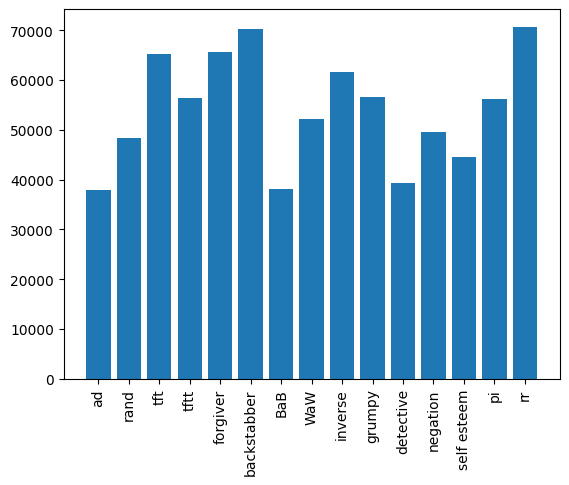

In [91]:
# Example tournament with a larger sample of tit for tat and 2000 rounds 

strats = [Always_Defect(0, "ad"), Random(1, "rand"), Tit_For_Tat(2, "tft"), Tit_For_Two_Tats(3, "tftt"), Forgiver(4, "forgiver")
         , Backstabber(5, "backstabber"), Better_And_Better(6, "BaB"), Worse_And_Worse(7, "WaW"), Inverse(8, "inverse"), Grumpy(9, "grumpy")
         , Detective(10, "detective"), Negation(11, "negation"), Self_Esteem(12, "self esteem"), Pi(13, "pi"), Retaliation_Runs(14, "rr")]

tournament = Round_Robin(strats, 2000)    
tournament.play_rr()

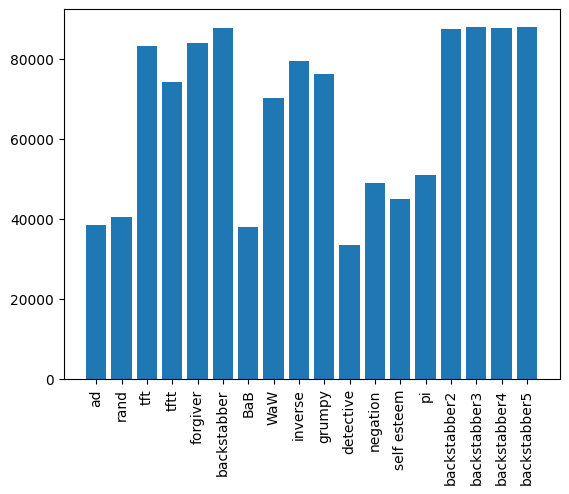

In [92]:
# Example tournament with a larger sample of tit for tat and 2000 rounds 

strats = [Always_Defect(0, "ad"), Random(1, "rand"), Tit_For_Tat(2, "tft"), Tit_For_Two_Tats(3, "tftt"), Forgiver(4, "forgiver")
         , Backstabber(5, "backstabber"), Better_And_Better(6, "BaB"), Worse_And_Worse(7, "WaW"), Inverse(8, "inverse"), Grumpy(9, "grumpy")
         , Detective(10, "detective"), Negation(11, "negation"), Self_Esteem(12, "self esteem"), Pi(13, "pi"), Tit_For_Tat(2, "tft2"), Tit_For_Tat(2, "tft3"),
          Tit_For_Tat(2, "tft4"), Tit_For_Tat(2, "tft5")]

tournament = Round_Robin(strats, 2000)    
tournament.play_rr()

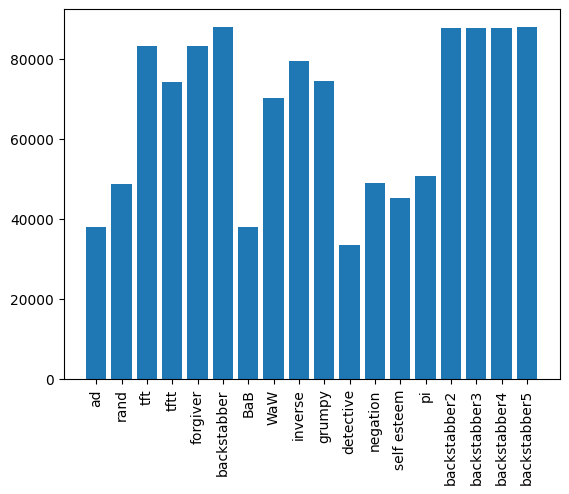

In [93]:
# Example tournament with a larger sample of backstabber and 2000 rounds 

strats = [Always_Defect(0, "ad"), Random(1, "rand"), Tit_For_Tat(2, "tft"), Tit_For_Two_Tats(3, "tftt"), Forgiver(4, "forgiver")
         , Backstabber(5, "backstabber"), Better_And_Better(6, "BaB"), Worse_And_Worse(7, "WaW"), Inverse(8, "inverse"), Grumpy(9, "grumpy")
         , Detective(10, "detective"), Negation(11, "negation"), Self_Esteem(12, "self esteem"), Pi(13, "pi"), Backstabber(14, "backstabber2"),
         Backstabber(15, "backstabber3"),Backstabber(16, "backstabber4"),Backstabber(17, "backstabber5"),]

tournament = Round_Robin(strats, 2000)    
tournament.play_rr()

In [5]:
# A dynamic version, where strategies can change mid-game
# Decision making process is modelled with a Markov Chain, with the following transition matrix:

transition_mat = [
    #T4T, Forgiver, RR, Inverse
    [],
    [],
    [],
    []
]
#sample dynamic program contains 4 possible programs and 4x4 transition matrix
class Dynamic(Strategy):
    def play_T4T(self, my_moves, opp_moves):
        if len(my_moves) == 0:
            return True
        else:
            return opp_moves[-1]
        
    def play_forgiver(self, my_moves, opp_moves):
        if(len(opp_moves) == 0):
            return True
        counter = 0
        for i in opp_moves:
            if not i:
                counter += 1
        if counter/len(opp_moves) >= 0.1:
            return False
        return True
    
    def play_RR(self, my_moves, opp_moves):
        retaliations = 1
        if len(opp_moves) > 1:
            num_defects = bool(not opp_moves[0]) + bool(not opp_moves[1])
        else:
            num_defects = 0
        for i in range(2,len(opp_moves)):
            if not opp_moves[i] and not opp_moves[i-1] and opp_moves[i-2]:
                retaliations += 1
            if not opp_moves:
                num_defects += 1
        if False in opp_moves[-(retaliations):]:
            return False
        return True
    
    def play_inverse(self, my_moves, opp_moves):
        last_index = -1
        counter = 0
        for move in opp_moves:
            if not move:
                last_index = counter
            counter += 1
        if last_index > 0:
            return random.random() > (1/(len(opp_moves) - last_index))
        return True
    
    
strategy_list = []
for i in range(0,16):
    strategy_list.append(Dynamic(i, str(i)))


[<__main__.Dynamic object at 0x0000016B54115CD0>, <__main__.Dynamic object at 0x0000016B54117050>, <__main__.Dynamic object at 0x0000016B541171D0>, <__main__.Dynamic object at 0x0000016B54117550>, <__main__.Dynamic object at 0x0000016B54116F90>, <__main__.Dynamic object at 0x0000016B541173D0>, <__main__.Dynamic object at 0x0000016B54116D10>, <__main__.Dynamic object at 0x0000016B54116E10>, <__main__.Dynamic object at 0x0000016B541172D0>, <__main__.Dynamic object at 0x0000016B541162D0>, <__main__.Dynamic object at 0x0000016B54116750>, <__main__.Dynamic object at 0x0000016B541169D0>, <__main__.Dynamic object at 0x0000016B54116710>, <__main__.Dynamic object at 0x0000016B54114550>, <__main__.Dynamic object at 0x0000016B54116590>, <__main__.Dynamic object at 0x0000016B54119490>]
